### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Exploratory Data Analysis

#### Missing Data

In [3]:
#Firstly lets see information about the data
#Its obvious that there is missing values in some of our records
#the data frame contains 891 records in total and each column must have 981 records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Here we want to see missing values by columns
#Age has 177 missing records since this is numeric data we will be able to perform amputation
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

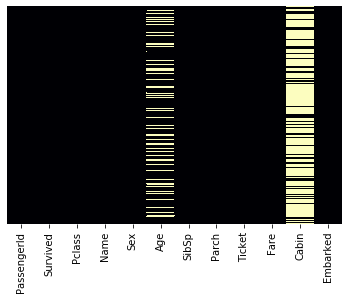

In [5]:
#We can also use seaborn to see missing values
#Now we can Visually see where most of the data is missing
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='magma')

### Data Amputation

In [6]:
#Age has 177 missing values 
#We will use amputation to replace this missing values
#from sklearn.impute import SimpleImputer

In [7]:
#imp_mean=SimpleImputer(strategy='mean')
#df['Age']=imp_mean.fit_transform(df[['Age']])

In [8]:
#Now let us see our new imputed data for age column
#df['Age'].isnull().sum()

In [9]:
#Now let take a pick of the entire data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

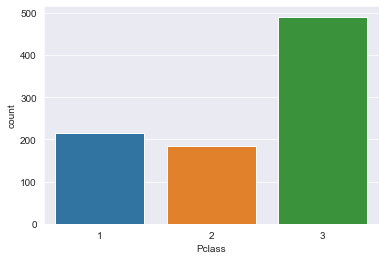

In [11]:
#Let see which class had a hihg number of passengers
sns.set_style(style='darkgrid')
ax=sns.countplot(x='Pclass',data=df)

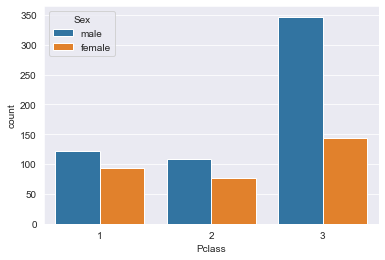

In [12]:
#Now let us see what gender where this people
ax = sns.countplot(x="Pclass", hue="Sex", data=df)

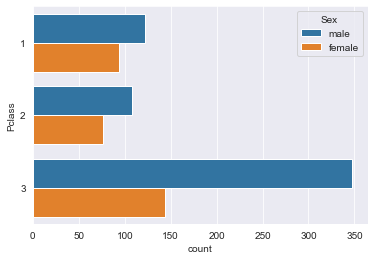

In [13]:
#We can also plot this bars horizontally
ax=sns.countplot(y='Pclass',hue='Sex',data=df)

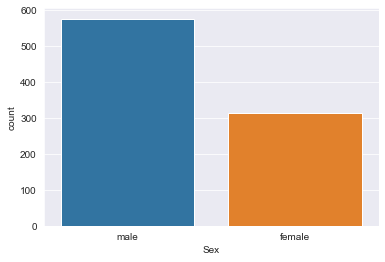

In [14]:
#We can also view data by a number of children and adults
ax=sns.countplot(x="Sex",data=df)

In [15]:
#people were categorised by male or female lets see if there where any people with age less than 18 years
df['age_group']=df['Age'].apply(lambda x: 'child' if x<8 else 'adult')

In [16]:
df['age_group']

0      adult
1      adult
2      adult
3      adult
4      adult
       ...  
886    adult
887    adult
888    adult
889    adult
890    adult
Name: age_group, Length: 891, dtype: object

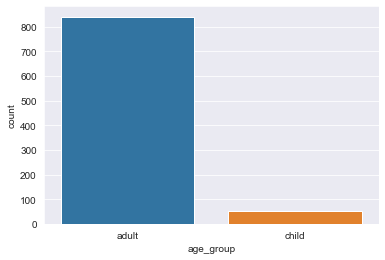

In [17]:
#Let us see if titanic had children
# and from the sctch below we can see that there were less than 100 children present in the boat
ax=sns.countplot(x='age_group',data=df)

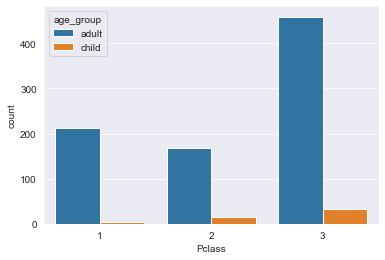

In [18]:
ax=sns.countplot(x='Pclass',hue='age_group',data=df)

##### Cabin column is useless,as a result we will have to drop it

In [19]:
df=df.drop(columns=['Cabin'],axis=1)

In [20]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


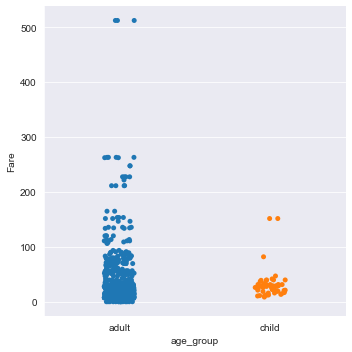

In [21]:
#Lets see
ax=sns.catplot(x='age_group',y='Fare',data=df)

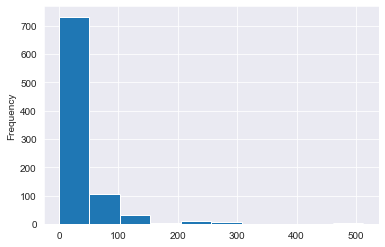

In [22]:
#Lets take a look on the Fare distribution
df.Fare.plot.hist()

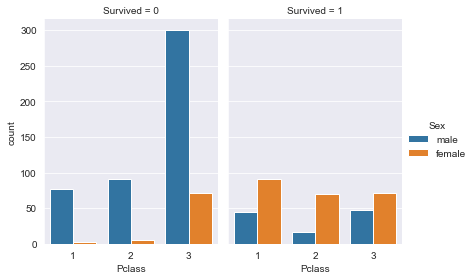

In [23]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df, kind="count",
                height=4, aspect=.7);

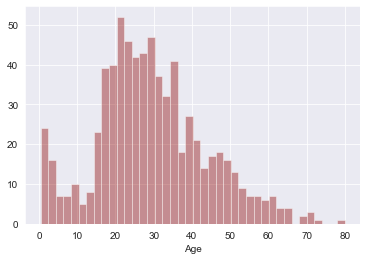

In [24]:
sns.distplot(df['Age'].dropna(),kde=False,color='darkred',bins=40)

In [25]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_group'],
      dtype='object')

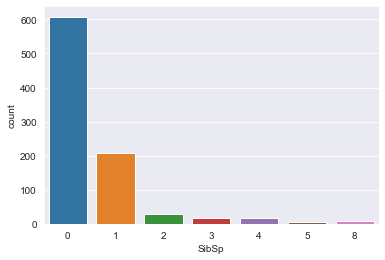

In [26]:
sns.countplot(x='SibSp', data=df)

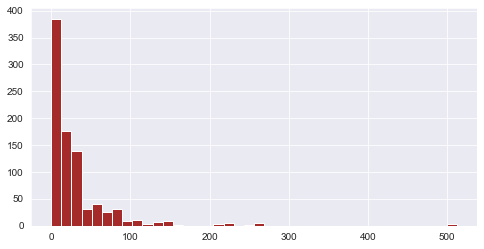

In [27]:
#The distribution of Fare for people who bought tickest
df['Fare'].hist(color='brown',bins=40,figsize=(8,4))

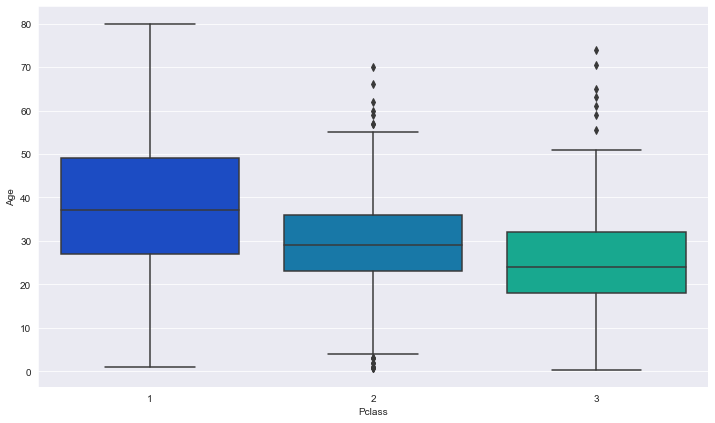

In [28]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age' ,data=df,palette='winter')

In [29]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_group'],
      dtype='object')

In [30]:
def computeage(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 39
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
   

In [31]:
df['Age']=df[['Age','Pclass']].apply(computeage,axis=1)

In [32]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

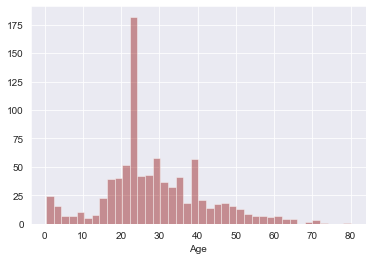

In [33]:
sns.distplot(df['Age'],kde=False,color='darkred',bins=40)

# Converting Categorical features

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [35]:
pd.get_dummies(df['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [36]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [37]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)
age_group=pd.get_dummies(df['age_group'],drop_first=True)

In [38]:
df.drop(['Ticket','Sex','Embarked','Name','age_group'],axis=1,inplace=True)

In [39]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [40]:
df=pd.concat([df,sex,embark,age_group],axis=1)

In [42]:
df.head(3)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,child
0,1,0,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,0


# Build Logistic Regression

In [43]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S', 'child'],
      dtype='object')

In [44]:
df.drop("Survived",axis=1).head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S,child
0,1,3,22.0,1,0,7.2500,1,0,1,0
1,2,1,38.0,1,0,71.2833,0,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1,0


In [45]:
df['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [52]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.30,random_state=101)

# Training and Predicting

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
predictions=log_model.predict(X_test)

# Performance Matrix

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
accuracy=confusion_matrix(y_test,predictions)

In [59]:
accuracy

array([[135,  19],
       [ 41,  73]], dtype=int64)

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy=accuracy_score(y_test,predictions)
accuracy*100

77.61194029850746

In [63]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)